# Calcaulation for the thermal effect of FUS on tissue

Example temperature increase deg C = 0.0005615369641065571 should be 0.007


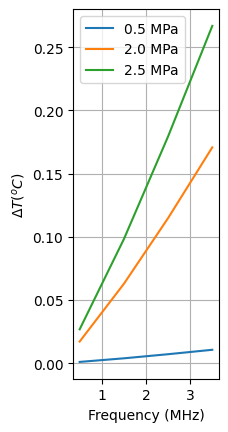

In [12]:
# Written by @hector.estrada
# Using values and formulae from
# https://www.sciencedirect.com/science/article/abs/pii/0301562979900863
# https://www.nature.com/articles/srep08743#methods
import numpy as np
import matplotlib.pyplot as plt

# Given constants
frequency = 0.25e6; # (Hz)
alpha = 1.75 # (Np/m)
pulseDuration = 300e-3 # (s)
rhoBrain = 1027.4 # (kg/m^3) density of brain tissue https://www.physiology.org/doi/full/10.1152/japplphysiol.00626.2004
cBrain = 3640 # (J kg^-1 C^-1) Specific heat of the brain tissue https://www.physiology.org/doi/full/10.1152/japplphysiol.00626.2004
attenuatedIntensity = 2.5e4 # (W/m^2) Assuming plane wave

DeltaT = 2*alpha*attenuatedIntensity*pulseDuration/(rhoBrain*cBrain) # Eq. (47) https://www.sciencedirect.com/science/article/pii/S0079610706000915?via%3Dihub
print ('Example temperature increase deg C = ' + repr(DeltaT) + ' should be 0.007')

# (3.0) Calculations for our frequency range
pressureAmplitude = np.array([0.5e6, 2e6, 2.5e6])  # (Pa)
for nn in np.arange(len(pressureAmplitude)):
    frequency = np.arange(0.5, 4) * 1e6  # (Hz)
    alpha = 100 * 0.024 * (frequency * 1e-6) ** 1.18  # (Np/m) absorption coefficient
    pulseDuration = 24e-3  # (s)
    rhoBrain = 1027.4  # (kg/m^3) density of brain tissue
    cBrain = 3640  # (J kg^-1 C^-1) Specific heat of the brain tissue
    sosBrain = 1540  # (m/s)
    attenuatedIntensity = pressureAmplitude[nn] ** 2 / (2 * rhoBrain * sosBrain)  # (W/m^2) Assuming plane wave
    DeltaT = 2 * alpha * attenuatedIntensity * pulseDuration / (rhoBrain * cBrain)  # Eq. (47)
    
    #DeltaF = (tempFluo(37 + DeltaT) - tempFluo(37)) / tempFluo(37) * 100

    plt.subplot(1, 3, 1)
    plt.plot(frequency * 1e-6, DeltaT, label=repr(pressureAmplitude[nn] * 1e-6) + ' MPa')
    
    # plt.subplot(1, 3, 3)
    # plt.plot(frequency * 1e-6, DeltaF, label=repr(pressureAmplitude[nn] * 1e-6) + ' MPa')

plt.subplot(1, 3, 1)
plt.xlabel('Frequency (MHz)')
plt.ylabel('$\Delta T (^{o} C)$')
plt.legend()
plt.grid('on')

# plt.subplot(1, 3, 3)
# plt.xlabel('Frequency (MHz)')
# plt.ylabel('$\Delta$ F (%)')
# plt.legend()
# plt.grid('on')

plt.show()
